# **Ejercicio 1 (50 puntos)**

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función `loadtxt` de numpy. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnica de Electroencefalografía para cada caso.

Para tu conjunto de datos:

1. **Determina si es necesario balancear los datos.**  
   * En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

2. **Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada,**  
   * Determina cuál de ellos es el más efectivo.

3. **Implementa desde cero el método de regresión logística,**  
   * Evalúalo con el conjunto de datos.

4. **Con alguno de los clasificadores que probaste en los pasos anteriores,**  
   * Determina el número óptimo de características utilizando un método tipo Filter.

5. **Repite el paso anterior, pero para un método de selección de características secuencial.**

6. **Repite el paso 4, pero para un método de selección de características recursivo.**

7. **Escoge alguna de las técnicas de selección de características que probaste con anterioridad,**  
   * Con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
     * Aplica el método de selección de características con todos los datos.
     * Ajusta el modelo con las características encontradas.

8. **Contesta las siguientes preguntas:**
   * ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?
   * De todos los clasificadores, ¿cuál o cuáles consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.
   * ¿Es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?
   * ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?
   * Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report




#1

In [2]:
import numpy as np
usecols = [0] + list(range(2, 128))


data = np.loadtxt('sample_data/P1_3.txt', delimiter='\t',usecols=usecols)


y = data[:, 0]
X = data[:, 1:]


In [4]:
print(X)

[[ 0.3925073   0.67657019  0.60180412 ...  0.35619094  0.12323151
   0.1014433 ]
 [-1.31487611 -0.73287418  0.41422541 ... -1.08830147 -1.09911094
   0.04776736]
 [-1.09345032 -0.68931183  0.07082691 ... -0.46893925  0.24300413
   0.06215462]
 ...
 [-0.72853565 -0.78422092  0.02350863 ...  1.20104421  0.79270147
   1.16211666]
 [ 1.77147543  0.83735529  0.18184615 ... -1.03458252 -1.49554304
  -0.86413404]
 [ 0.47996947 -0.54432989 -0.75249618 ...  0.06798049 -0.57390381
  -1.00163938]]


#Balanceo y prueba de 8 modelos

In [5]:
from collections import Counter

clases, conteo = np.unique(y, return_counts=True)
class_counts = Counter(y)

print('Distribución de clases:', class_counts)

for clase, count in zip(clases, conteo):
    print(f"Clase {int(clase)}: {count} Ejemplos")

Distribución de clases: Counter({2.0: 1496, 1.0: 298})
Clase 1: 298 Ejemplos
Clase 2: 1496 Ejemplos


In [13]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}


results = {}


for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")

    accuracy_total = 0


    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        undersample = RandomUnderSampler(sampling_strategy={2: 298}, random_state=42)
        X_res, y_res = undersample.fit_resample(X_train, y_train)


        model.fit(X_res, y_res)


        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_total += accuracy


    accuracy_avg = accuracy_total / n_folds
    results[model_name] = accuracy_avg
    print(f"Precisión promedio para {model_name}: {accuracy_avg:.4f}\n")


best_model_name = max(results, key=results.get)
print(f"\nEl modelo más efectivo es: {best_model_name} con una precisión promedio de {results[best_model_name]:.4f}")

Evaluando modelo: Random Forest
Precisión promedio para Random Forest: 0.8579

Evaluando modelo: SVM
Precisión promedio para SVM: 0.8735

Evaluando modelo: K-Nearest Neighbors
Precisión promedio para K-Nearest Neighbors: 0.7575

Evaluando modelo: Logistic Regression
Precisión promedio para Logistic Regression: 0.8618

Evaluando modelo: Decision Tree
Precisión promedio para Decision Tree: 0.7380

Evaluando modelo: Naive Bayes
Precisión promedio para Naive Bayes: 0.8484

Evaluando modelo: Gradient Boosting
Precisión promedio para Gradient Boosting: 0.8462

Evaluando modelo: AdaBoost
Precisión promedio para AdaBoost: 0.8300


El modelo más efectivo es: SVM con una precisión promedio de 0.8735


#Regresion logistica


In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5
    cost = (-1 / m) * (np.dot(y, np.log(h + epsilon)) + np.dot(1 - y, np.log(1 - h + epsilon)))
    return cost

def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (h - y))
    return grad

def train_logistic_regression(X, y, num_classes, alpha=0.01, num_iters=1000):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])
    all_theta = np.zeros((n + 1, num_classes))

    for c in range(num_classes):
        y_c = (y == c + 1).astype(int)
        theta = np.zeros(n + 1)
        for _ in range(num_iters):
            theta -= alpha * gradient(theta, X, y_c)
        all_theta[:, c] = theta

    return all_theta

def predict(X, all_theta):
    m = X.shape[0]
    X = np.hstack([np.ones((m, 1)), X])
    predictions = sigmoid(np.dot(X, all_theta))
    return np.argmax(predictions, axis=1) + 1



X_res_scaled = StandardScaler().fit_transform(X_res)


num_classes = 2
theta = train_logistic_regression(X_res_scaled, y_res, num_classes)


y_pred = predict(X_res_scaled, theta)


accuracy = np.mean(y_res == y_pred)
conf_matrix = confusion_matrix(y_res, y_pred)
class_report = classification_report(y_res, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)


Precisión del modelo: 0.9109
Matriz de confusión:
[[221  20]
 [ 28 270]]
Reporte de clasificación:
              precision    recall  f1-score   support

         1.0       0.89      0.92      0.90       241
         2.0       0.93      0.91      0.92       298

    accuracy                           0.91       539
   macro avg       0.91      0.91      0.91       539
weighted avg       0.91      0.91      0.91       539



# Filter


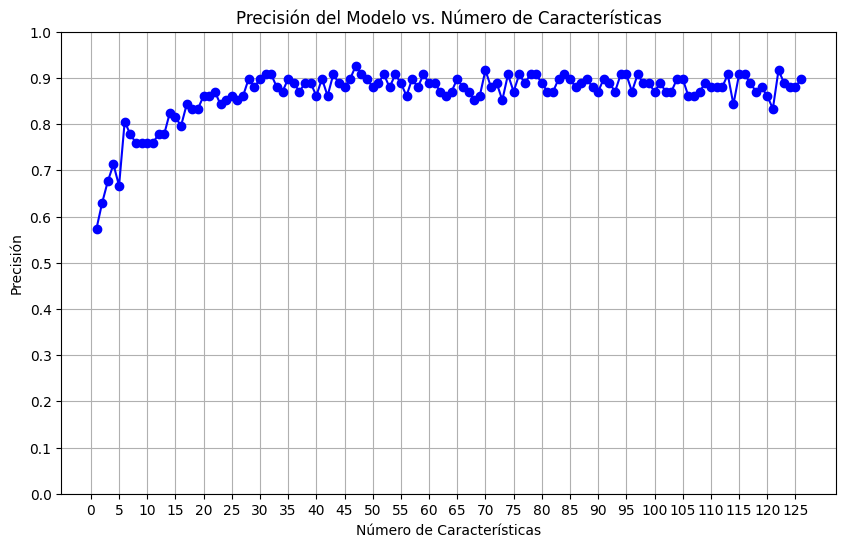

Número óptimo de características: 47
Mejor precisión obtenida: 0.9259


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


num_features = []
accuracies = []


for k in range(1, X_train.shape[1] + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_selected, y_train)

    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    num_features.append(k)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o', linestyle='-', color='b')
plt.title('Precisión del Modelo vs. Número de Características')
plt.xlabel('Número de Características')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(np.arange(0, X_train.shape[1] + 1, step=5))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()


optimal_k = num_features[np.argmax(accuracies)]
print(f"Número óptimo de características: {optimal_k}")
print(f"Mejor precisión obtenida: {max(accuracies):.4f}")


## **Mucho tiempo de ejecución para el recursivo y secuencial!!!**

#Secuancial


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

print("----- Selección de características usando el 50% de los predictores -----")


clf = SVC(kernel='linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select=0.5)
fselection.fit(X, y)

print("Características seleccionadas: ", fselection.get_feature_names_out())


X_transformed = fselection.transform(X)
clf.fit(X_transformed, y)


cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X, y):


    X_train = X[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel='linear')

    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(X_train, y_train)
    X_train = fselection_cv.transform(X_train)

    clf_cv.fit(X_train, y_train)

    # Fase de prueba
    X_test = fselection_cv.transform(X[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(X_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#------------------------------------------------------------------------------------------------------------------
# Encontrar el número óptimo de características usando validación cruzada
#------------------------------------------------------------------------------------------------------------------

print("----- Selección óptima del número de características -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n características =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X, y):

        # Fase de entrenamiento
        X_train = X[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel='linear')

        fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(X_train, y_train)
        X_train = fselection_cv.transform(X_train)

        clf_cv.fit(X_train, y_train)

        # Fase de prueba
        X_test = fselection_cv.transform(X[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(X_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Características")
plt.ylabel("Precisión")

plt.show()

# Ajustar el modelo con el número óptimo de características
clf = SVC(kernel='linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select=opt_features)
fselection.fit(X, y)

print("Características seleccionadas: ", fselection.get_feature_names_out())

X_transformed = fselection.transform(X)
clf.fit(X_transformed, y)

----- Selección de características usando el 50% de los predictores -----


KeyboardInterrupt: 

# Recursivo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE

print("----- Feature selection using 50% of predictors -----")

# Select features
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select=int(X_res.shape[1] * 0.5))
fselection.fit(X_res, y_res)

print("Selected features: ", fselection.get_support(indices=True))

# Fit model using the new dataset
X_transformed = fselection.transform(X_res)
clf.fit(X_transformed, y_res)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X_res, y_res):

    # Training phase
    X_train = X_res[train_index, :]
    y_train = y_res[train_index]

    clf_cv = SVC(kernel='linear')

    fselection_cv = RFE(clf_cv, n_features_to_select=int(X_res.shape[1] * 0.5))
    fselection_cv.fit(X_train, y_train)
    X_train = fselection_cv.transform(X_train)

    clf_cv.fit(X_train, y_train)

    # Test phase
    X_test = fselection_cv.transform(X_res[test_index, :])
    y_test = y_res[test_index]
    y_pred = clf_cv.predict(X_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------

print("----- Optimal selection of number of features -----")

n_feats = range(1, X_res.shape[1] + 1)
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X_res, y_res):

        # Training phase
        X_train = X_res[train_index, :]
        y_train = y_res[train_index]

        clf_cv = SVC(kernel='linear')

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(X_train, y_train)
        X_train = fselection_cv.transform(X_train)

        clf_cv.fit(X_train, y_train)

        # Test phase
        X_test = fselection_cv.transform(X_res[test_index, :])
        y_test = y_res[test_index]
        y_pred = clf_cv.predict(X_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select=opt_features)
fselection.fit(X_res, y_res)

print("Selected features: ", fselection.get_support(indices=True))

X_transformed = fselection.transform(X_res)
clf.fit(X_transformed, y_res)

----- Feature selection using 50% of predictors -----
Selected features:  [  1   2   3   4   6   7   8   9  11  12  13  14  15  17  18  21  23  24
  26  27  28  29  30  32  39  40  43  48  49  50  51  52  53  54  55  58
  60  61  65  66  71  73  75  76  79  86  88  89  94  96  99 100 101 102
 104 108 109 110 111 112 113 120 125]
              precision    recall  f1-score   support

         1.0       0.87      0.90      0.89       600
         2.0       0.90      0.87      0.88       600

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200

----- Optimal selection of number of features -----
---- n features = 1


KeyboardInterrupt: 

# Preguntas

## ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?


Si si es un problema, si no consideramos el desbalance tendríamos un sesgo hacia la clase mayoritaria y una precisión engañosa


Es bueno balancear los datos, pero tiene que tener cuidado tanto de un sobreajuste por crear datos "falso" así como una perdida de información, por eliminar datos importantes.

## De todos los clasificadores, ¿cuál o cuáles consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.


El clasificador que salió con mejor para nuestros datos, fue el SVM, este tiene una alta capacidad para maximizar el margen entre clases, esto es ideal en lugares donde las clases son linealmente separables, como en nuestro caso donde se espera que la respuesta cerebral difiera con claridad entre estado atento y no atento.

## ¿Es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?


Si, si es posible reducir la dimensionalidad, ya que existen datos que no son igual de relevante que otros, por lo que es posible.

## ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?


En mi caso, no termina de correr ninguno de los dos, por el poder computacional que requiere, pero puedo decir que Recurive Feature Elimination es una buena opción, ya que este elimina características menos importante de manera iterativa, lo que ayuda a encontrar el subconjunto óptimo.

## Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

Podemos realizar una optimización de hiperparametros, esto nos ayudaría a encontrar los hiperparametros óptimos, para que nuestro modelo tenga una mayor precisión.

# **Ejercicio 2 (50 puntos)**

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posibles (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función `loadtxt` de numpy. A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

Para este conjunto de datos:

1. **Determina si es necesario balancear los datos.**  
   * En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

2. **Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada,**  
   * Determina cuál de ellos es el más efectivo.

3. **Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros.**  
   * Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

4. **Prepara tus modelos para producción haciendo lo siguiente:**
   * Obtén los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
   * Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

5. **Contesta lo siguiente:**
   * ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?
   * ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.
   * ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.
   * ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?


In [ ]:
usecols = [0] + list(range(2, 128))


data = np.loadtxt('sample_data/M_3.txt', delimiter='\t',usecols=usecols)


y = data[:, 0]
X = data[:, 1:]


#Balanceo

Distribución de clases:
Clase 1: 90 muestras
Clase 2: 90 muestras
Clase 3: 90 muestras
Clase 4: 90 muestras
Clase 5: 90 muestras
Clase 6: 90 muestras
Clase 7: 90 muestras


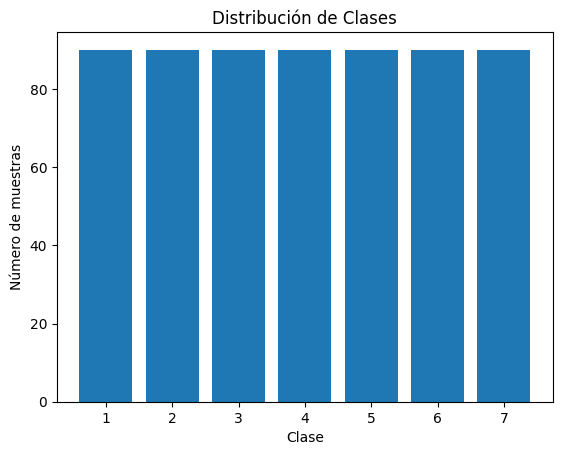

In [ ]:
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))


print("Distribución de clases:")
for cls, count in class_distribution.items():
    print(f"Clase {int(cls)}: {count} muestras")


plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Distribución de Clases')
plt.show()

#8 modelos


In [ ]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}


results = {}

for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")

    accuracy_total = 0

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_total += accuracy

    accuracy_avg = accuracy_total / n_folds
    results[model_name] = accuracy_avg
    print(f"Precisión promedio para {model_name}: {accuracy_avg:.4f}\n")


best_model_name = max(results, key=results.get)
print(f"\nEl modelo más efectivo es: {best_model_name} con una precisión promedio de {results[best_model_name]:.4f}")


Evaluando modelo: Random Forest
Precisión promedio para Random Forest: 0.8810

Evaluando modelo: SVM
Precisión promedio para SVM: 0.8889

Evaluando modelo: K-Nearest Neighbors
Precisión promedio para K-Nearest Neighbors: 0.8968

Evaluando modelo: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precisión promedio para Logistic Regression: 0.8937

Evaluando modelo: Decision Tree
Precisión promedio para Decision Tree: 0.7794

Evaluando modelo: Naive Bayes
Precisión promedio para Naive Bayes: 0.8254

Evaluando modelo: Gradient Boosting
Precisión promedio para Gradient Boosting: 0.8778

Evaluando modelo: AdaBoost
Precisión promedio para AdaBoost: 0.4302


El modelo más efectivo es: K-Nearest Neighbors con una precisión promedio de 0.8968


# Parametros

----- KNN classifier - K parameter -----
Precisión promedio para KNN con validación cruzada anidada: 0.8841
Optimal k: 4


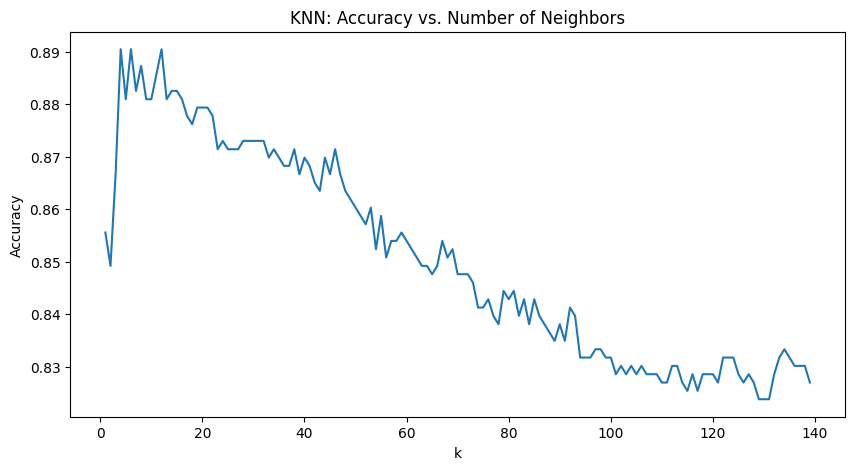

----- SVM classifier - Regularization parameter -----
Precisión promedio para SVM con validación cruzada anidada: 0.9048
Optimal C: 0.021544346900318846


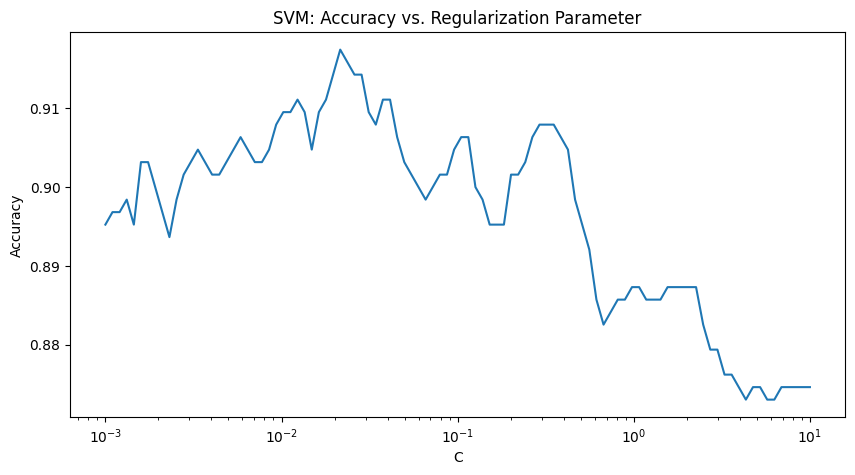

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

param_grid_knn = {'n_neighbors': np.arange(1, 140)}
param_grid_svm = {'C': np.logspace(-3, 1, 100)}


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("----- KNN classifier - K parameter -----")

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=kf, scoring='accuracy')
cross_val_results_knn = cross_val_score(grid_search_knn, X, y, cv=kf, scoring='accuracy')

print(f"Precisión promedio para KNN con validación cruzada anidada: {np.mean(cross_val_results_knn):.4f}")

best_knn_model = grid_search_knn.fit(X, y)
opt_k = best_knn_model.best_params_['n_neighbors']
print(f"Optimal k: {opt_k}")


plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 140), best_knn_model.cv_results_['mean_test_score'])
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy vs. Number of Neighbors")
plt.show()


print("----- SVM classifier - Regularization parameter -----")

svm = SVC(kernel='linear')
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=kf, scoring='accuracy')
cross_val_results_svm = cross_val_score(grid_search_svm, X, y, cv=kf, scoring='accuracy')

print(f"Precisión promedio para SVM con validación cruzada anidada: {np.mean(cross_val_results_svm):.4f}")


best_svm_model = grid_search_svm.fit(X, y)
opt_c = best_svm_model.best_params_['C']
print(f"Optimal C: {opt_c}")


plt.figure(figsize=(10, 5))
plt.plot(grid_search_svm.cv_results_['param_C'].data, best_svm_model.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("SVM: Accuracy vs. Regularization Parameter")
plt.show()

# Producción

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



parameters = {'n_neighbors': np.arange(1, 140)}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


print("----- Model evaluation -----")
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf_cv = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
    clf_cv.fit(X_train, y_train)

    y_pred = clf_cv.predict(X_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


print("----- Model evaluation with cross_val_predict -----")
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
y_pred = cross_val_predict(clf, X, y, cv=5)
print(classification_report(y, y_pred))

print("----- Production model -----")
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
clf.fit(X, y)
print(clf.best_estimator_)




----- Model evaluation -----
              precision    recall  f1-score   support

         1.0       0.81      0.88      0.84        90
         2.0       0.80      0.73      0.77        90
         3.0       0.94      0.87      0.90        90
         4.0       0.98      0.89      0.93        90
         5.0       0.93      0.91      0.92        90
         6.0       0.76      0.86      0.81        90
         7.0       0.94      1.00      0.97        90

    accuracy                           0.88       630
   macro avg       0.88      0.88      0.88       630
weighted avg       0.88      0.88      0.88       630

----- Model evaluation with cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.77      0.90      0.83        90
         2.0       0.77      0.69      0.73        90
         3.0       0.92      0.87      0.89        90
         4.0       0.98      0.90      0.94        90
         5.0       0.95      0.91      0.93        

In [ ]:
best_n_neighbors = 11
clf_best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
clf_best_knn.fit(X, y)


y_pred_knn = clf_best_knn.predict(X)


print("----- Evaluación del modelo KNN -----")
print("Mejores hiperparámetros:", {'n_neighbors': best_n_neighbors})
print("Precisión en el conjunto completo de datos:", clf_best_knn.score(X, y))
print("Reporte de clasificación:\n", classification_report(y, y_pred_knn))
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_knn))

----- Evaluación del modelo KNN -----
Mejores hiperparámetros: {'n_neighbors': 11}
Precisión en el conjunto completo de datos: 0.9142857142857143
Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       0.85      0.91      0.88        90
         2.0       0.85      0.80      0.82        90
         3.0       0.98      0.91      0.94        90
         4.0       0.98      0.91      0.94        90
         5.0       0.97      0.94      0.96        90
         6.0       0.86      0.92      0.89        90
         7.0       0.94      1.00      0.97        90

    accuracy                           0.91       630
   macro avg       0.92      0.91      0.91       630
weighted avg       0.92      0.91      0.91       630

Matriz de confusión:
 [[82  4  0  2  2  0  0]
 [ 8 72  1  0  0  9  0]
 [ 0  0 82  0  0  5  3]
 [ 1  6  0 82  1  0  0]
 [ 5  0  0  0 85  0  0]
 [ 0  3  1  0  0 83  3]
 [ 0  0  0  0  0  0 90]]


In [ ]:

parameters = {'C': np.logspace(-3, 1, 100)}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


print("----- Evaluación del modelo -----")
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf_cv = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
    clf_cv.fit(X_train, y_train)

    y_pred = clf_cv.predict(X_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


print("----- Evaluación con cross_val_predict -----")
clf = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
y_pred = cross_val_predict(clf, X, y, cv=5)
print(classification_report(y, y_pred))

print("----- Modelo para Producción -----")
clf = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
clf.fit(X, y)
print(clf.best_estimator_)


----- Evaluación del modelo -----
              precision    recall  f1-score   support

         1.0       0.90      0.91      0.91        90
         2.0       0.81      0.80      0.80        90
         3.0       0.94      0.90      0.92        90
         4.0       0.99      0.94      0.97        90
         5.0       0.93      0.94      0.94        90
         6.0       0.80      0.81      0.81        90
         7.0       0.94      1.00      0.97        90

    accuracy                           0.90       630
   macro avg       0.90      0.90      0.90       630
weighted avg       0.90      0.90      0.90       630

----- Evaluación con cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.81      0.91      0.86        90
         2.0       0.80      0.74      0.77        90
         3.0       0.90      0.86      0.88        90
         4.0       0.98      0.94      0.96        90
         5.0       0.94      0.90      0.92        90

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


best_C = 0.007054802310718645
clf_best_svm = SVC(C=best_C, kernel='linear')
clf_best_svm.fit(X, y)


y_pred_svm = clf_best_svm.predict(X)


print("----- Evaluación del modelo SVM -----")
print("Mejores hiperparámetros:", {'C': best_C})
print("Precisión en el conjunto completo de datos:", clf_best_svm.score(X, y))
print("Reporte de clasificación:\n", classification_report(y, y_pred_svm))
print("Matriz de confusión:\n", confusion_matrix(y, y_pred_svm))


----- Evaluación del modelo SVM -----
Mejores hiperparámetros: {'C': 0.007054802310718645}
Precisión en el conjunto completo de datos: 0.9285714285714286
Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       0.93      0.94      0.94        90
         2.0       0.91      0.83      0.87        90
         3.0       0.93      0.92      0.93        90
         4.0       0.98      0.99      0.98        90
         5.0       0.97      0.97      0.97        90
         6.0       0.84      0.84      0.84        90
         7.0       0.94      1.00      0.97        90

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630

Matriz de confusión:
 [[85  2  0  1  2  0  0]
 [ 3 75  0  1  0 11  0]
 [ 0  0 83  0  0  4  3]
 [ 0  0  0 89  1  0  0]
 [ 1  2  0  0 87  0  0]
 [ 2  3  6  0  0 76  3]
 [ 0  0  0  0  0  0 90]]


# Preguntas

## ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?


No se presentan problemas en cuanto la balanceo de clases, todas tiene el mismo número de ejemplos.

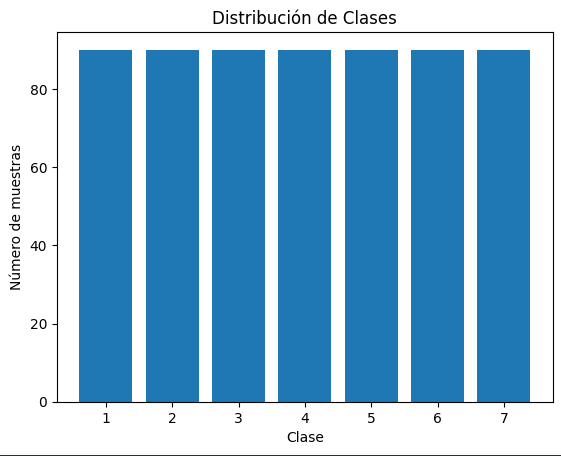

## ¿Qué modelo o modelos fueron efectivos para clasificar tus datos?  ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.



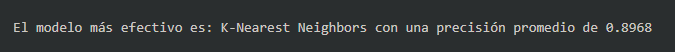


Seguido de SVM.

Algo especial a destacar es que podemos ver como modelos simples superar a modelos más robustos y complicados, lo que quiere decir que no siempre un modelo complejo es sinónimo de mejor.

Hice los modelos con hiperparametros predeterminados, por lo que puede que no sea el mejor resultado para cada modelo respectivamente (incluso sale un warning en la regresión logística) por lo que se podría ajustar algunos y ver si realmente K-Nearest es el mejor modelo.

##¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.


Si, se puede observar una mejora significativa cuando se optimizan los hiperparametros, si es el resultado esperado, la selección y ajuste de hiperparametros puede tener un impacto significativo en el rendimiento del modelo.

## ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

Uno de los principales inconvenientes al encontrar los hiperparametros ideales, es el costo computación alto, la búsqueda de estos puede ser costosa en tiempo y recursos computacionales.

Otro inconveniente es el sobreajuste, esto sucede por que el modelo puede ajustarse a las peculiaridades del conjunto de validación en lugar de generalizar.